# Segmented/Piecewise regression
Linear regression for segments

**The idea is:**
- 


LINKS IDEAS:
- https://stackoverflow.com/questions/8999389/segmented-linear-regression-in-python
- http://www.xavierdupre.fr/app/mlinsights/helpsphinx/notebooks/piecewise_linear_regression.html
- https://datascience.stackexchange.com/questions/8457/python-library-for-segmented-regression-a-k-a-piecewise-regression
- http://www.xavierdupre.fr/app/mlinsights/helpsphinx/notebooks/piecewise_linear_regression.html
- https://stackoverflow.com/questions/29382903/how-to-apply-piecewise-linear-fit-in-python
- https://piecewise-regression.readthedocs.io/en/latest/ if x> 0.5 -> model lr1
- if x<= 0.5 -> model lr2

In [21]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### 1. Generate data example

In [70]:
# generate data
# rule: if x <= 0.5 -> y = 70/x

X_train = np.array([[0.2], [0.3], [0.35], [0.7], [0.8], [0.9]]) 
y_train = np.array([350, 233, 200, 50, 60, 70])  

X_train = pd.DataFrame(X_train)
y_train = pd.DataFrame(y_train)

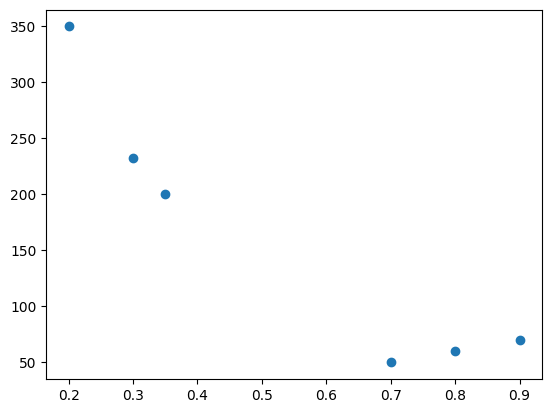

In [71]:
# plot data
plt.scatter(X_train, y_train)

## CLASSIC LINEAR REGRESSION

In [45]:
# train
classic_lr = LinearRegression()
classic_lr.fit(X_train, y_train)

# metric
classic_lr.score(X_train, y_train)

0.8680291967342497

## SEGMENTED LINEAR REGRESSION

### 1. Generate Pipeline sklearn to identify the segments

In [55]:
# Función para determinar qué regresión lineal usar
def select_model(X):
    threshold = 0.5  # Definir el threshold deseado
    if np.mean(X) > threshold:
        return LinearRegression()
    else:
        return LinearRegression()

# Crear el pipeline
pipeline = Pipeline([
    ('select_model', FunctionTransformer(select_model)),
    ('regression', 'passthrough')  # Placeholder para el modelo seleccionado
])

### 2. Train model

In [59]:
# Entrenar el pipeline
pipeline.fit(X_train, y_train)

Pipeline(steps=[('select_model',
                 FunctionTransformer(func=<function select_model at 0x0000015A4B503250>)),
                ('regression', 'passthrough')])

In [57]:
# r2
pipeline.score(X_train, y_train)

AttributeError: 'str' object has no attribute 'score'

In [58]:
# Predicción
X_test = [[0.8]]  # Ejemplo de dato de prueba
prediction = pipeline.predict(X_test)
print("Predicción:", prediction)

AttributeError: 'str' object has no attribute 'predict'

In [75]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.base import BaseEstimator, TransformerMixin
import numpy as np

# Ejemplo de datos de entrenamiento
X_train = np.array([[0.2], [0.3], [0.35], [0.7], [0.8], [0.9]])
y_train = np.array([350, 233, 200, 50, 60, 70])

# Definir el threshold
threshold = 0.5

# Clase personalizada para seleccionar datos según el threshold
class DataSelector(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        X_high = X[X > threshold].reshape(-1, 1)
        X_low = X[X <= threshold].reshape(-1, 1)
        return X_high, X_low

# Crear una instancia de la clase DataSelector
data_selector = DataSelector()

# Crear el pipeline
pipeline = Pipeline([
    ('data_selector', data_selector),
    ('regression_high', LinearRegression()),
    ('regression_low', LinearRegression())
])

# Entrenar el pipeline
pipeline.fit(X_train, y_train)

# Función para predecir usando el pipeline
def predict_with_threshold(X):
    X_high, X_low = data_selector.transform(X)
    predictions_high = pipeline.named_steps['regression_high'].predict(X_high)
    predictions_low = pipeline.named_steps['regression_low'].predict(X_low)
    
    # Combinar las predicciones
    predictions_combined = np.concatenate((predictions_high, predictions_low))
    return predictions_combined

# Ejemplo de predicción
X_test = np.array([[0.8], [0.2]])
predictions = predict_with_threshold(X_test)
print("Predicciones:", predictions)

TypeError: All intermediate steps should be transformers and implement fit and transform or be the string 'passthrough' 'LinearRegression()' (type <class 'sklearn.linear_model._base.LinearRegression'>) doesn't